In [ ]:
#| default_exp segmentation.vis

# segmentation visualization

> API details.

In [ ]:
#|hide
from nbdev.showdoc import *

In [ ]:
#| export
import polvo as pv
import PIL
import numpy as np
import matplotlib as mpl

/home/lgvaz/miniconda3/envs/allpolvo/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#| export
def overlay_mask(
    image:PIL.Image,
    mask:PIL.Image,
    nclasses:int,
    cmap:mpl.colors.Colormap=mpl.colormaps['gist_ncar'],
    alpha:float=0.5,
):
    mask = np.asarray(mask)
    if not len(mask.shape) == 2: raise ValueError(f'Mask bust be 2d, but got {mask.shape}')
    
    colored_mask = np.zeros((*mask.shape, 3), dtype=np.uint8)
    for class_idx in np.unique(mask):
        mask_idxs = mask == class_idx
        colored_mask[mask_idxs] = np.array(cmap(class_idx/nclasses)[:3]) * 255

    return PIL.Image.blend(image, PIL.Image.fromarray(colored_mask), alpha)

In [ ]:
image = pv.open_image(pv.test.SEG_IMAGE)
mask = pv.open_mask(pv.test.SEG_MASK)

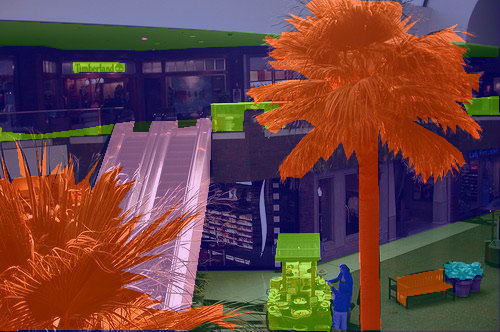

In [ ]:
overlay_mask(image, mask, 105)

In [ ]:
#| hide
from nbdev import nbdev_export
nbdev_export()